# Data Analysis of the Best 250 Movies of All Times

## Calling the Necessary Libraries and Functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# The 'Lin_Reg' function finds the least square regression line for the two lists 'Lone' and 'Ltwo'. Parameter 'c'
# specifies the color of the regression line.

def Lin_Reg(Lone,Ltwo,c):
    a=np.polyfit(Lone,Ltwo,1)
    y=lambda x: a[0]*x+a[1]
    b=np.linspace(min(Lone),max(Lone),200)
    return plt.plot(b,y(b),color=c)

## Calling the Data from 'Data Cleansing' File

In [3]:
path='/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/Homework-02/Cleansed_Data.csv'

In [4]:
df=pd.read_csv(path)

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.shape

(250, 9)

### Displaying the Dataframe consisting the Data of the Best 250 Movies of All Times

As indicated below, the dataframe consists of 9 columns. The columns are:
1. Movie_Name: displaying the official name of the movie.
2. Movie_url: displaying the electronic address of the movie found in rottentomatoes website.
3. Genre: displaying the movie's genre.
4. Movie_Year: displaying the year in which the movie was screened for the first time.
5. Box_Office_(USD): displaying how much (in US dollars) the movie sold during the year in was screened at cinemas.
6. Box_Office_(USD_2020): displaying the equivalent amount of Box_Office_(USD) at present time (2020).
7. Critic_Ratings: displaying the ratings (from 100%) given by critics of the rottentomatoes website.
8. Audience_Ratings: displaying the average ratings given by all the audience of rottentomatoes website.
9. Runtime_(min): displaying the length of the movie in minutes.

In [7]:
df.head()

,Movie_Name,Movie_url,Genre,Movie_Year,Box_Office_(USD),Box_Office_(USD_2020),Critic_Ratings,Audience_Ratings,Runtime_(min)
0,The Godfather,http://www.rottentomatoes.com/m/12911,"drama,crime",1972,134800000,838456000,98.0,98.0,177.0
1,12 Angry Men,http://www.rottentomatoes.com/m/18108,drama,1957,57020001,527435009,100.0,97.0,95.0
2,The Godfather: Part II,http://www.rottentomatoes.com/m/12926,"drama,crime",1974,57020001,300495405,98.0,97.0,200.0
3,Seven Samurai,http://www.rottentomatoes.com/m/16992,action,1954,271700,2624622,100.0,97.0,208.0
4,Schindler's List,http://www.rottentomatoes.com/m/12903,"history,drama",1993,96600000,173880000,97.0,97.0,195.0


## Data Analysis

### Finding the Shape of Ratings Distribution

1. We would like to investigate the shape of distributions for the two kinds of ratings, namely the Critic Ratings, and the Audience Ratings. As is observed, the Critic Ratings distribution is left-skewed as more than 65 movies (out of 250) have received the highest rating (100%=mode of distribution). On the other hand, the distribution of the ratings given by all adience tends to be more symmetric around 93% (which is the mode of the distribution).

Text(0, 0.5, 'Frequency')

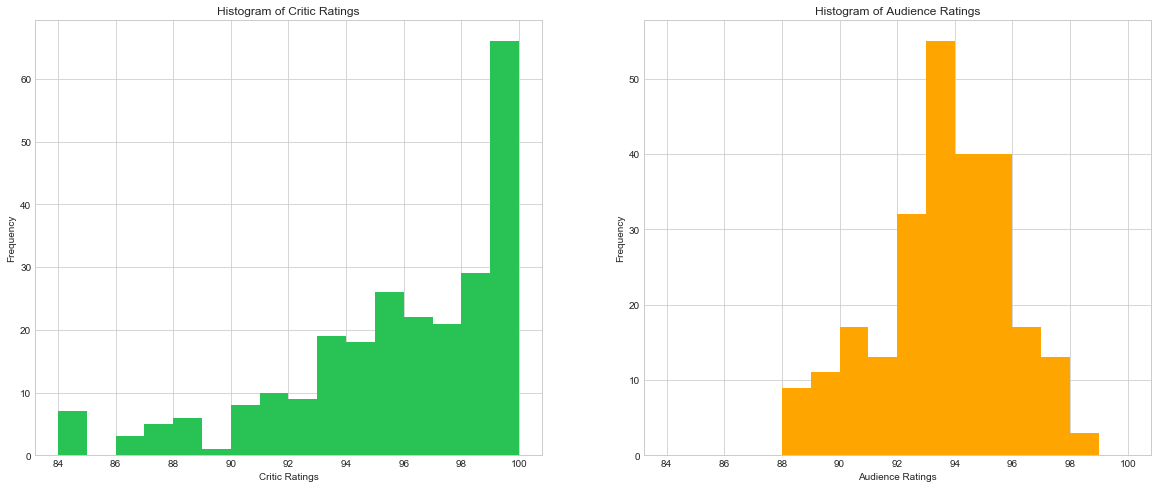

In [8]:
bins=[i for i in range(84,101)]

plt.gcf().set_size_inches((20, 8)) 
plt.subplot(1,2,1)
plt.hist(df.Critic_Ratings,bins,color=(4*0.04,4*0.19,3*0.11))
plt.title('Histogram of Critic Ratings')
plt.xlabel('Critic Ratings')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(df.Audience_Ratings,bins,color='orange')
plt.title('Histogram of Audience Ratings')
plt.xlabel('Audience Ratings')
plt.ylabel('Frequency')

2. We divide the the period 1920 to 2020 into 10 decades. We would like to see which decade has been the most 'productive' decade of the history of cinema so far. As is observed below, the decade **1950-1960** has the highest number of best movies. After that, the decade *1990-2000* has been the next most productive decade of cinema. The least productive decade in the history of cinema belongs to *1930-1940* (which by the way is coincidentally the period of post World War I and the beginning of World War II! There might exist a correlation between the two, but we are not able to address this question here with the current data set.)

Text(0, 0.5, 'Frequency')

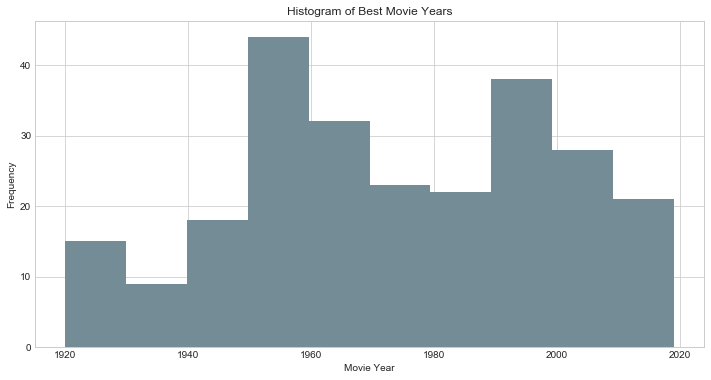

In [9]:
plt.gcf().set_size_inches((12, 6)) 
plt.hist(df.Movie_Year,color=(0.45,0.55,0.59))
plt.title('Histogram of Best Movie Years')
plt.xlabel('Movie Year')
plt.ylabel('Frequency')

3. We would like to investigate the box office (the amount the movie has sold tickets in cinemas) of the best 250 movies in consideration. In order to be able to compare the box office of different movies in **different years**, we convert the box office of all movies to the equivalent amount in the year 2020. The range of box office of the considered best 250 movies is from 0.5 Billion dollars to 4 Billion dollars. The following plot shows that about 36 movies (the highest frequency) have sold between 0.5-0.6 Billion dollars. The next highest frequency (16 movies) has sold 0.7-0.8 Billion dollars. The highest office box in these 250 movies belongs to the movie *Gone With the Wind* produced in 1939!

Text(0, 0.5, 'Frequency')

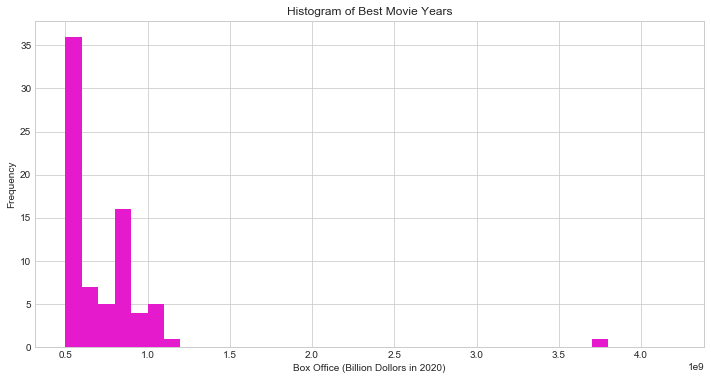

In [10]:
bins=[100000000*i+500000000 for i in range(38)]

plt.gcf().set_size_inches((12, 6)) 
plt.hist(df['Box_Office_(USD_2020)'],bins,color=(5*0.18,5*0.02,5*0.16))
plt.title('Histogram of Best Movie Years')
plt.xlabel('Box Office (Billion Dollors in 2020)')
plt.ylabel('Frequency')

In [11]:
df[df['Box_Office_(USD_2020)']>3000000000]

,Movie_Name,Movie_url,Genre,Movie_Year,Box_Office_(USD),Box_Office_(USD_2020),Critic_Ratings,Audience_Ratings,Runtime_(min)
127,Gone With the Wind,http://www.rottentomatoes.com/m/9818,"romance,history,drama",1939,198700000,3715690000,91.0,92.0,222.0


4. We would like to investigate if there is any correlation between the length of a movie and its box office. Since both of these varilables are continuous, we can find the scatter plot of the two variables and find the simple linear regression. As indicated below, the data at hand does not support a strong correlation between the movie length and its box office.

Text(0, 0.5, 'Box Office (USD)')

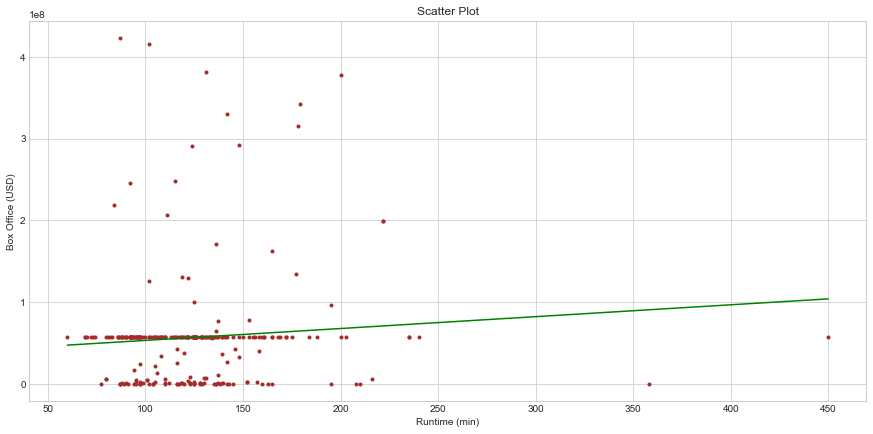

In [12]:
plt.gcf().set_size_inches((15, 7)) 
plt.plot(df['Runtime_(min)'],df['Box_Office_(USD)'],'.',color='brown')
Lin_Reg(df['Runtime_(min)'],df['Box_Office_(USD)'],'g')
plt.title('Scatter Plot')
plt.xlabel('Runtime (min)')
plt.ylabel('Box Office (USD)')

5. The statistical summary of the dataframe is displayed below. Among different factors below, it is interesting to note mean of the values for runtime (movie length) of the 250 considered movies is about 125 minutes. It is also observed that the mean of values for box office (converted to the value of US dollar in 2020) is about 323 million dollars.  

In [13]:
df.describe()

,Movie_Year,Box_Office_(USD),Box_Office_(USD_2020),Critic_Ratings,Audience_Ratings,Runtime_(min)
count,250.000000,2.500000e+02,2.500000e+02,250.000000,250.000000,250.000000
mean,1973.744000,5.702000e+07,3.229151e+08,95.444000,93.160000,125.540000
std,25.598194,7.064910e+07,3.718201e+08,4.061632,2.256272,41.534526
min,1920.000000,6.400000e+03,1.540000e+04,84.000000,88.000000,60.000000
25%,1955.000000,5.575000e+06,1.183800e+07,93.000000,92.000000,97.000000
50%,1973.500000,5.702000e+07,2.446158e+08,96.000000,93.000000,122.000000
75%,1995.750000,5.702000e+07,5.237287e+08,99.000000,95.000000,137.000000
max,2019.000000,4.228000e+08,3.715690e+09,100.000000,98.000000,450.000000
